## PROJECT: NO-SHOW MEDICAL APPOINTMENTS

<a id='intro'></a>
## Introduction

### Dataset Description 

In this analysis we will be investigating one hundred (100) thousand records of medical appointments in Brazil with the goal of determining if patients will show up for their medical appointments or not based on a number of variables.
We will base investiagation on these columns present in the dataset;

- __PatientID__ - a unique identifier for each patient
- __AppointmentID__ - a unique identify for each appointment by an individual
- __Gender__ - indicate if the patient is male or female
- __ScheduledDay__ - the day appointment was booked
- __AppointmentDay__ - day for appointment with medical expert
- __Age__ - specify how old is the patient
- __Neighbourhood__ - specify the location of the medical facility for which appointment will take place
- __Scholarship__ - indicates whether or not the patient is enrolled in Brasilian welfare program 'Bolsa Família'
- __Hipertension__ - indicates if the patient suffers from hipertension
- __Diabetes__ - indicate if patient suffers from Diabetes
- __Alcoholism__ - indicate if patient is an alcoholic
- __Handcap__ - indicates if patient suffers any disability
- __SMS_received__ - indicates if patient received one or more correspondence via sms
- __No-Show__ - indicates if appointee showed up for their appointemen. if 'No' appointee showed up. if 'Yes' its a no-show


### Question(s) for Analysis

>We will focus on variables/factors that will help predict if a patient will show up for their appointment or not. To acheive this, we will attempt to answer the following questions during the analysis;
>>- What factors are most important in determining if patients will show up for their schdeuled appointment
- If the appointment day fall on a weekday or weekend, does it influence whether or a the patient show up for appointment
- Does the location of the facility contributes to a no-show
- Is the age of the patient a contributive factor to no-show
- Which gender records more no-show for their appointments

In [1]:
# import modules/liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.


In [3]:
# Load your data and gain overview of data.
df_no_show = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# record counts
df_no_show.shape

(110527, 14)

In [5]:
# summary statistic of dataset
df_no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# column names, data type and missing values
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
>In this section of the analysis we will be checking and dropping less significant missing values, dupplicate records and columns irrelevant to our analysis. also we will be computing additional columns to aid our analysis.
 

In [7]:
# check for number of duplicates
df_no_show.duplicated().sum()

0

In [8]:
# drop irrelevant columns
df_no_show.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df_no_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# drop record with invalid age value
df_no_show.drop(df_no_show.query('Age < 0').index, axis=0, inplace=True)
df_no_show.query('Age < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
# convert datatypes to appropriate types

df_no_show['ScheduledDay'] = pd.to_datetime(df_no_show['ScheduledDay'])
df_no_show['AppointmentDay'] = pd.to_datetime(df_no_show['AppointmentDay'])
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [11]:
# harmonize column labels for ease of use and consistency

df_no_show.rename(columns=lambda x: x.lower().replace('-','_'), inplace=True)
df_no_show.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# compute required column information for analysis

#compute day of week for appointment day
df_no_show['appointment_week_day'] = df_no_show['appointmentday'].dt.day_name()

In [13]:
# map the value of the no-show column; 0 -'No' and 1 -'Yes' for easy of analysis

df_no_show['no_show'] = df_no_show['no_show'].apply(lambda x: 0 if x=='No' else 1)
df_no_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_week_day
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dc4d06320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0dc4b524e0>]], dtype=object)

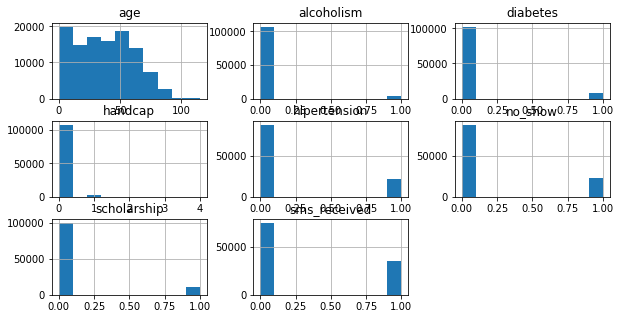

In [14]:
df_no_show.hist(figsize=(10,5))

The following was implemented and deduced in the course of wraggling data;

- No missing value in the dataset
- No duplicate in the dataset
- Dropped record with invalid age value (-1)
- Columns 'PatientId', 'AppointmentID' are specific to patient and appointment respectively and are irrelevant, as such were dropped.
- converted ScheduledDay and AppointmentDay columns from str type to datetime.
- harmonized column labels to lower case for consistency purposes.
- computed columns to indicate weekday names for appointments.
- mapped values in the no-show column to 0 and 1.

From the overview of the dataset, it can be gleaned that majority of the patient with appointment bookings are 50years or less and that the number of patients that turn up for appointments far exceeds the number of no-shows.
also only a very small proportion of the Patients;

- Are alcoholics
- Suffers from diabetes
- Are handicaped
- Are hypertensive
- receive sms communications from the medical facility
- have scholarship


<a id='eda'></a>
## Exploratory Data Analysis



### What factors are most important in determining if patients will show up for their schdeuled appointment?

In [15]:
# filter for show and no-show appointments 0/False- show  1/True- no-show 

show = df_no_show['no_show'] == False
no_show = df_no_show['no_show'] == True

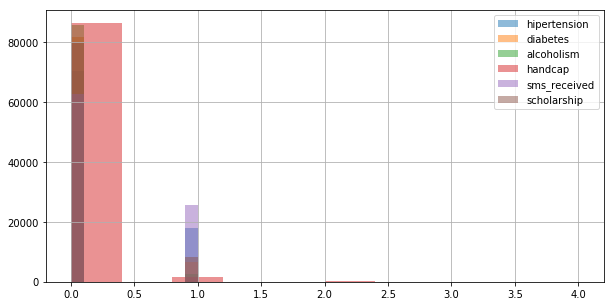

In [16]:
# distribution for show based presence of disease condition

df_no_show['hipertension'][show].hist(figsize = (10, 5), alpha=0.5, label='hipertension')
df_no_show['diabetes'][show].hist(figsize = (10, 5), alpha=0.5, label='diabetes')
df_no_show['alcoholism'][show].hist(figsize = (10, 5), alpha=0.5, label='alcoholism')
df_no_show['handcap'][show].hist(figsize = (10, 5), alpha=0.5, label='handcap')
df_no_show['sms_received'][show].hist(figsize = (10, 5), alpha=0.5, label='sms_received')
df_no_show['scholarship'][show].hist(figsize = (10, 5), alpha=0.5, label='scholarship')
plt.legend()

The histogram above show distributions of patients that show up for their appointments for different variables of hipertension, diabetes, alcoholism, handicap, sms_received and scholarship.

We use histogram for this visualization because this is a univariant analysis for all the quantitative variables in our dataset.
### From the chart we can conclude that;
- From the distribution above it can be seen that most patients that show up for appointment have no known case of a disease, do not suffer from alcoholism neither did they receive sms notification or have scholarship.
- Also we see that more patients show up if they receive SMS communications from the medical facility. this is closely followed by hypertensive patients

### If the appointment day fall on a weekday or weekend, does it influence whether or a the patient show up for appointment?

In [28]:
# define function to create bar chart for code reuse.
base_color = sns.color_palette()[0]
def draw_bar(dataframe, label_ang=90, ylabel="", xlabel="", title=""):
    dataframe.plot(kind='bar', rot=label_ang , color = base_color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

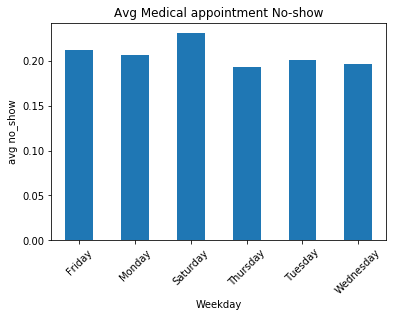

In [29]:
# average of patient that do not show on a weekend or weekday (remember 0-show, 1 -no_show)

df_no_show_mean = df_no_show.groupby('appointment_week_day').no_show.mean()
draw_bar(df_no_show_mean, label_ang=45, ylabel='avg no_show', xlabel='Weekday', title='Avg Medical appointment No-show' )
# df_no_show_mean.plot(kind='bar', rot=45)
# plt.ylabel('avg no_show')
# plt.xlabel('Weekday')
# plt.title('Avg Medical appointment No-show')

The figure above is a bar chart illustrating average no-show for appointments for each weekday.
We use bar chart here for bivariant analysis to correlate weekday (categorical variable) and avg no-show (Quantitative variabel).

### From the chart we can conclude that;
- A higher number of No-Show was recorded if appointment day falls on a Friday or Saturday (Weekend).

### Does the location of the facility contributes to a no-show?

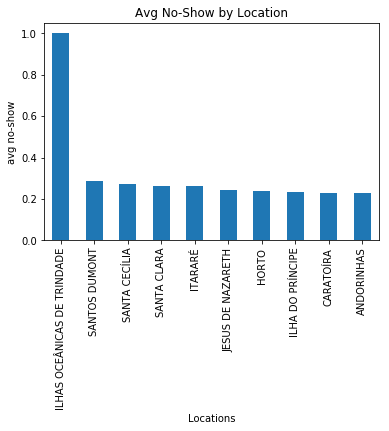

In [30]:
# avg of No-show based on location - Top 10 locations

df_no_show_location = df_no_show.groupby('neighbourhood').no_show.mean().sort_values(ascending=False)[:10]
draw_bar(df_no_show_location, ylabel="avg no-show", xlabel="Locations", title="Avg No-Show by Location")
# df_no_show_location.plot(kind='bar')
# plt.xlabel('Locations')
# plt.ylabel('avg no-show')
# plt.title('Avg No-Show by Location')

The bar chart above illustrate avg no-show per location for the top 10 locations. since location is a categorical varible in our dataset, the bar chart is suitable for creating this pictorial relationship with the no-show variable.

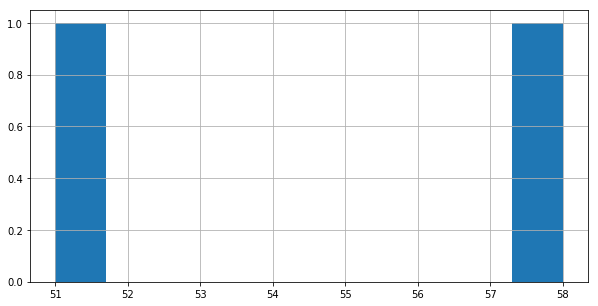

In [20]:
# let investigate the age of patients in the outlier location and whether or not they received SMS or are hypertensive
# since these are our most important factors for patients to show up for appointments.

location = df_no_show['neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'
df_no_show[location].age.hist(figsize=(10,5), label='age')

The histogram above shows age distribution of patients that didn't show up for their appointments in medical facility located at ILHAS OCEÂNICAS DE TRINDADE

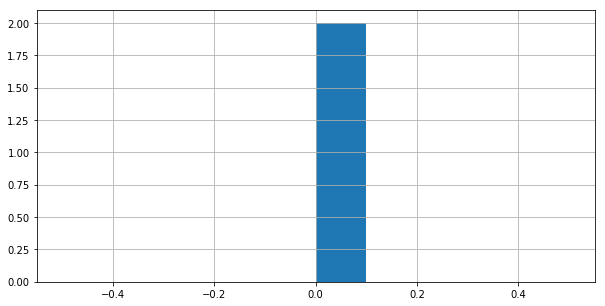

In [21]:
# distribution of patient that received sms in this location

df_no_show[location].sms_received.hist(figsize=(10,5))

The histogram above shows the distribution of sms counts received by patients that booked appointments in ILHAS OCEÂNICAS DE TRINDADE

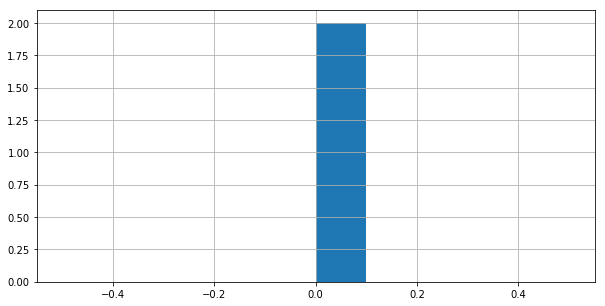

In [22]:
# distribution of patients that are hypertensive in this location

df_no_show[location].hipertension.hist(figsize=(10,5))

The histogram above shows the distribution of patients that are hypertensive in ILHAS OCEÂNICAS DE TRINDADE location.

### From the analyses above we can draw the following conclusions;

- The location of the medical facility affects if patients shows up or not. specifically, medical facilities located at ILHAS OCEÂNICAS DE TRINDADE experiences no-show for all booked appointments.
- Patients booking this facility receive no SMS communication nor are hypertensive which are major factors in no-show.

For this analysis we only consider top 10 locations with no-shows due to the large number of locations available in the dataset.

### Is the age of the patient a contributive factor to no-show?

In [23]:
# average age of patients with show and no-show

df_no_show[show].age.mean(), df_no_show[no_show].age.mean()

(37.790504154999034, 34.317666562121957)

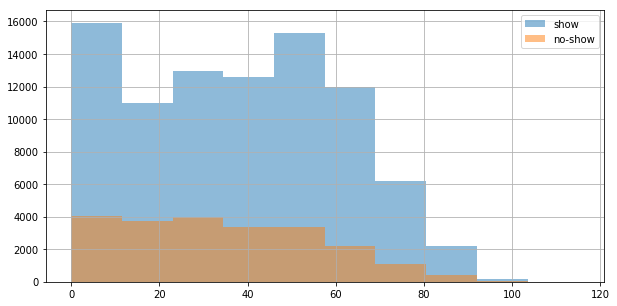

In [24]:
# age distribution of patient that show up for appoint and those that didn't.

df_no_show[show].age.hist(figsize=(10,5), label='show', alpha=0.5)
df_no_show[no_show].age.hist(figsize=(10,5), label='no-show', alpha=0.5)
plt.legend()

The chart above shows the age distribution for patients that showed up for their appointments and those that didn't.
### From the chart we can conclude that;

- The average age of patients that show up for appointment is greater than avg age for patients that didn't show up.
- More children (0-10) and middle aged (45-50) patients show up for appointments.

### Which gender records more no-show for their appointments?

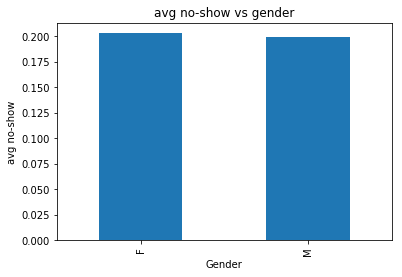

In [31]:
# avg no-show for each gender

df_no_show_gender = df_no_show.groupby('gender').no_show.mean()
draw_bar(df_no_show_gender, xlabel='Gender', ylabel='avg no-show', title='avg no-show vs gender')
# df_no_show_gender.plot(kind='bar')
# plt.ylabel('avg no-show')

The bar chart above illustrate average no-show for both male and female. this chart is suitable for establishing relationship between gender (categorical variable) and avg no-show (quantitative variable).

In [26]:
# count of male and female patients bookings
df_no_show.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

### Deductions

- More female patients didn't show up for their appointments compared to male patient.

We can see that more females booked appointment than male, as such there may not be a strong correlation between no-show and gender to draw the above conclusion.

<a id='conclusions'></a>
## Conclusions


## Summary


The following conclusions were derived base analysis result from the dataset.

- Medical facilities should send sms communications to patients regarding their appointments.
as patients who receive sms are more likely to show up for their appointments as seen from analysis.
- Appointments should be fixed on weekdays rather than weekend as there is an increased
probabilty of patients pulling a no-show for weekend appointments. though we don't have enough
data to make decisive conclusions as to why more patients don't show up for weekend appointments
- Facility location can affect if a patient shows up for appointments or not. although this is
dependent on other factors like if patients received sms from the facility or if patients that book
appointments are hypertensive as these are two important factors that have been identified for
patients that show up to their appointments.
- More children and middle aged patients tend to show up for their appointment.
- More woment tend to not show up compared to their male counterpart. but we couldn't
establish a strong correlation between gender of patients and no-show as more women than
men also booked for an appointment.

### Limitations;

- This analysis results may not be wholistic as we tend to establish relationship 
between few of the variables per time.
- Also due to the numerious number of locations in the dataset only the top 10 with no-show was considered
in our analysis of location and only the outlier location were we experienced a 100% no-show was analyzed.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0